In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas_profiling import ProfileReport

In [6]:
df=pd.read_csv('ev_sales.csv')
df

,Unnamed: 0,max sales volume,market share,state,Public EV Charging Stations,Average gross income
0,ADAPTED VEHICLE,5,0.004419,Karnataka,136,223175
1,AGRICULTURAL TRACTOR,1,0.000884,Punjab,11,151491
2,BUS,233,0.205941,Maharashtra,317,202130
3,E-RICKSHAW(P),49885,44.091781,Uttar Pradesh,108,65431
4,E-RICKSHAW WITH CART (G),2658,2.349323,Uttar Pradesh,108,65431
5,FORK LIFT,30,0.026516,Gujarat,27,213936
6,GOODS CARRIER,62,0.054800,Tamil Nadu,212,213396
7,LUXURY CAB,11,0.009723,West Bengal,22,121463
8,MAXI CAB,1,0.000884,Haryana,55,247628
9,M-CYCLE/SCOOTER,42461,37.529941,Maharashtra,317,202130


In [8]:
df.shape

(24, 6)

In [10]:
df.describe()

,max sales volume,market share,Public EV Charging Stations,Average gross income
count,24.000000,24.000000,24.000000,24.000000
mean,4714.125000,4.166667,174.458333,196986.750000
std,12894.810319,11.397317,166.963932,77113.298069
min,1.000000,0.000884,4.000000,65431.000000
25%,2.750000,0.002431,27.000000,143984.000000
50%,63.500000,0.056126,136.000000,213396.000000
75%,2686.000000,2.374071,238.250000,223175.000000
max,49885.000000,44.091781,597.000000,376221.000000


In [11]:
df.dtypes

Unnamed: 0                      object
max sales volume                 int64
market share                   float64
state                           object
Public EV Charging Stations      int64
Average gross income             int64
dtype: object

In [29]:
df.isnull().sum()

Unnamed: 0                     0
max sales volume               0
market share                   0
state                          0
Public EV Charging Stations    0
Average gross income           0
dtype: int64

In [50]:
x = df.iloc[:,[1,2]].values #For the columns 'Max.Sales volume'&'market share'
print(x)

[[5.00000000e+00 4.41934300e-03]
 [1.00000000e+00 8.83869000e-04]
 [2.33000000e+02 2.05941364e-01]
 [4.98850000e+04 4.40917809e+01]
 [2.65800000e+03 2.34932251e+00]
 [3.00000000e+01 2.65160550e-02]
 [6.20000000e+01 5.47998480e-02]
 [1.10000000e+01 9.72255400e-03]
 [1.00000000e+00 8.83869000e-04]
 [4.24610000e+04 3.75299410e+01]
 [6.50000000e+01 5.74514540e-02]
 [3.26800000e+03 2.88848231e+00]
 [1.18600000e+03 1.04826806e+00]
 [5.04500000e+03 4.45911666e+00]
 [3.00000000e+00 2.65160600e-03]
 [2.77000000e+03 2.44831579e+00]
 [1.00000000e+00 8.83869000e-04]
 [3.40800000e+03 3.01222390e+00]
 [2.00000000e+00 1.76773700e-03]
 [1.00000000e+00 8.83869000e-04]
 [1.37500000e+03 1.21531921e+00]
 [6.38000000e+02 5.63908113e-01]
 [2.90000000e+01 2.56321870e-02]
 [1.00000000e+00 8.83869000e-04]]


In [37]:
#choosing no. of clusters by WCSS

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

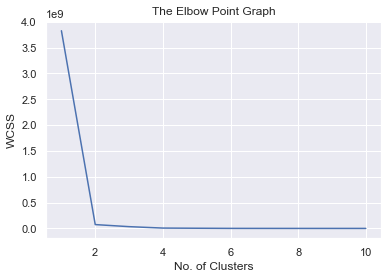

In [38]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
#from graph we can take 2 as the optimum no. of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
y = kmeans.fit_predict(x)
print(y)

#Below we can see the data got divided into two clusters named '0' & '1'

[0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


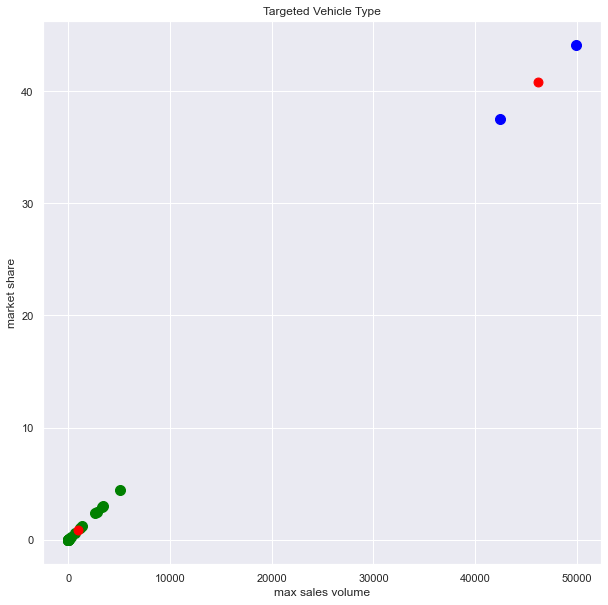

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(x[y==0,0], x[y==0,1], s=100, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=100, c='blue', label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='red', label='centroids')

plt.title('Targeted Vehicle Type')
plt.xlabel('max sales volume')
plt.ylabel('market share')
plt.show()


In [ ]:
#Understanding:
#From the data only 3rd and 9th vehicle are in 2nd cluster which are having good max sales volume and market share.
#the other vehicle which are having less sales and share are in cluster 1. So,now we know that vehicles which to be targeted more means the 2nd cluster. 

In [54]:
m = df.iloc[:,[4,5]].values
print(m)

[[   136 223175]
 [    11 151491]
 [   317 202130]
 [   108  65431]
 [   108  65431]
 [    27 213936]
 [   212 213396]
 [    22 121463]
 [    55 247628]
 [   317 202130]
 [   212 213396]
 [    27 213936]
 [   597 376221]
 [   317 202130]
 [   136 223175]
 [   136 223175]
 [   136 223175]
 [   212 213396]
 [    25 104889]
 [    22 121463]
 [   597 376221]
 [   136 223175]
 [     4 104989]
 [   317 202130]]


In [55]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
    kmeans.fit(m)
    wcss.append(kmeans.inertia_)

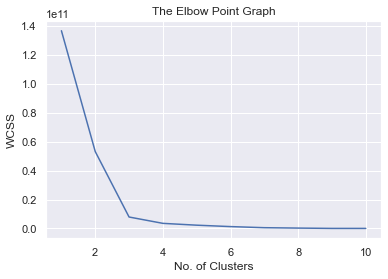

In [56]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
n = kmeans.fit_predict(m)
print(n)
#Below are the states are in clusters '0','1','2'. 

[1 2 1 2 2 1 1 2 1 1 1 1 0 1 1 1 1 1 2 2 0 1 2 1]


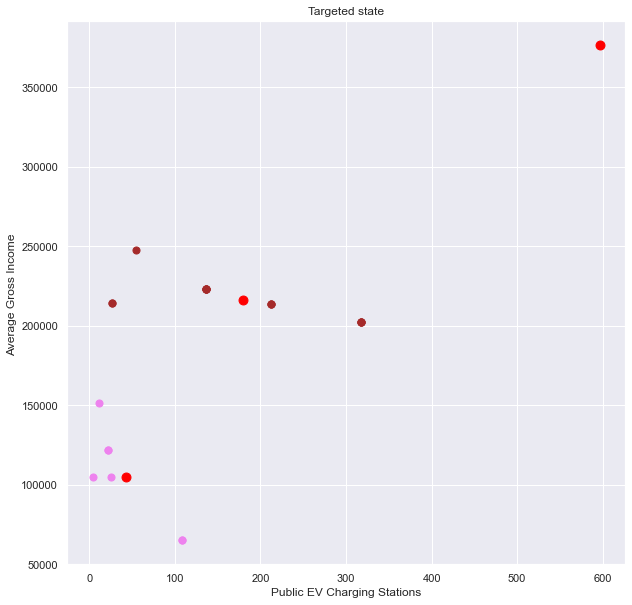

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(m[n==0,0], m[n==0,1], s=50, c='orange', label='Cluster 1')
plt.scatter(m[n==1,0], m[n==1,1], s=50, c='brown', label='Cluster 2')
plt.scatter(m[n==2,0], m[n==2,1], s=50, c='violet', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='red', label='centroids')

plt.title('Targeted state')
plt.xlabel('Public EV Charging Stations')
plt.ylabel('Average Gross Income ')
plt.show()
